In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer


In [3]:
data_file = "../data/HousingData.csv"
houseDF = pd.read_csv(data_file)
houseDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
houseDF_dropna = houseDF.dropna()
houseDF_dropna.info()


<class 'pandas.core.frame.DataFrame'>
Index: 394 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     394 non-null    float64
 1   ZN       394 non-null    float64
 2   INDUS    394 non-null    float64
 3   CHAS     394 non-null    float64
 4   NOX      394 non-null    float64
 5   RM       394 non-null    float64
 6   AGE      394 non-null    float64
 7   DIS      394 non-null    float64
 8   RAD      394 non-null    int64  
 9   TAX      394 non-null    int64  
 10  PTRATIO  394 non-null    float64
 11  B        394 non-null    float64
 12  LSTAT    394 non-null    float64
 13  MEDV     394 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 46.2 KB


In [5]:
featureDF = houseDF_dropna.drop(["MEDV"], axis=1)
targetSR = houseDF_dropna["MEDV"]


In [6]:
tree_model = DecisionTreeRegressor().fit(featureDF, targetSR)


In [7]:
importance = tree_model.feature_importances_
importance


array([4.27276749e-02, 1.38491218e-03, 1.21515685e-02, 5.38335228e-04,
       1.68331075e-02, 6.00192690e-01, 1.24524708e-02, 5.02533215e-02,
       1.11863741e-04, 9.96042911e-03, 2.96970860e-02, 3.92859732e-03,
       2.19767944e-01])

In [8]:
importanceDF = pd.DataFrame(importance, index=featureDF.columns, columns=["Importance"])
importanceDF.sort_values("Importance", ascending=False)


,Importance
RM,0.600193
LSTAT,0.219768
DIS,0.050253
CRIM,0.042728
PTRATIO,0.029697
NOX,0.016833
AGE,0.012452
INDUS,0.012152
TAX,0.009960
B,0.003929


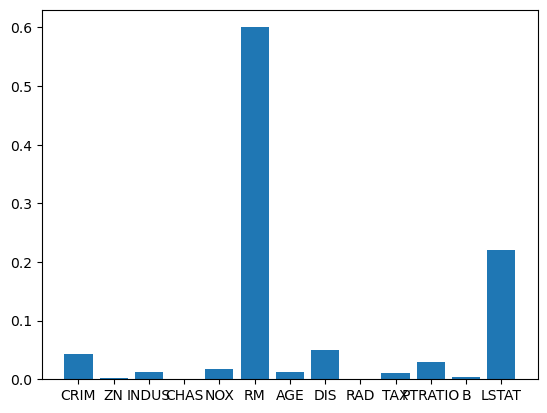

In [9]:
plt.bar(importanceDF.index, importanceDF["Importance"])
plt.show()


In [10]:
imputer = KNNImputer().fit(houseDF)


In [11]:
houseDF_imputed = pd.DataFrame(imputer.transform(houseDF), columns=houseDF.columns)
houseDF_imputed.isna().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [12]:
featureDF2 = houseDF_imputed.drop(["MEDV"], axis=1)
targetSR2 = houseDF_imputed["MEDV"]
tree_model2 = DecisionTreeRegressor().fit(featureDF2, targetSR2)


In [13]:
importance2 = tree_model2.feature_importances_
importance2


array([2.88604254e-02, 5.89133958e-04, 2.14882477e-03, 8.94609525e-04,
       6.17449779e-02, 5.72643292e-01, 7.26377554e-03, 8.72436387e-02,
       4.89248627e-04, 1.31946060e-02, 1.53748157e-02, 5.89510103e-03,
       2.03657550e-01])

In [14]:
importanceDF2 = pd.DataFrame(
    importance2, index=featureDF2.columns, columns=["Importance"]
)
importanceDF2.sort_values("Importance", ascending=False)


,Importance
RM,0.572643
LSTAT,0.203658
DIS,0.087244
NOX,0.061745
CRIM,0.028860
PTRATIO,0.015375
TAX,0.013195
AGE,0.007264
B,0.005895
INDUS,0.002149


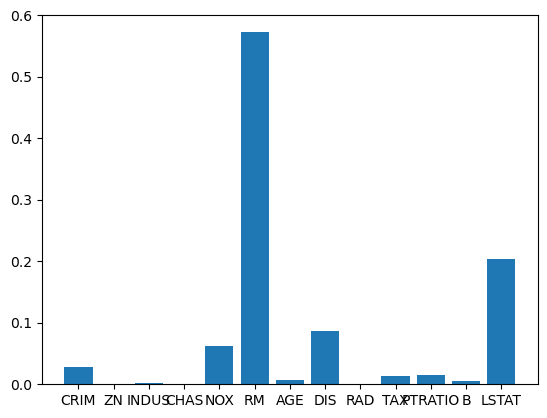

In [15]:
plt.bar(importanceDF2.index, importanceDF2["Importance"])
plt.show()


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR)

model = DecisionTreeRegressor().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)


(1.0, 0.8075245746177382)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(featureDF2, targetSR2)

model = DecisionTreeRegressor().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)


(1.0, 0.8436125955757081)